
# Lab | Customer Analysis Final Round

For this lab, we still keep using the `marketing_customer_analysis.csv` file that you can find in the `files_for_lab` folder.

It's time to put it all together. Remember the previous rounds and follow the steps as shown in previous lectures.

### 01 - Problem (case study)

- Data Description.
- Goal.

### 02 - Getting Data

- Read the `.csv` file.

### 03 - Cleaning/Wrangling/EDA

- Change headers names.
- Deal with NaN values.
- Categorical Features.
- Numerical Features.
- Exploration.

### 04 - Processing Data

- Dealing with outliers.
- Normalization.
- Encoding Categorical Data.
- Splitting into train set and test set.

### 05 - Modeling

- Apply model.

### 06 - Model Validation

- R2.
- MSE.
- RMSE.
- MAE.

### 07 - Reporting

- Present results.


In [2]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# import sys
# import statistics
import math


In [3]:


data = pd.read_csv("/home/mono/gitHub/lab-customer-analysis-round-2/files_for_lab/csv_files/marketing_customer_analysis.csv")

#data1 = pd.read_csv("/home/mono/gitHub/ ... ")

In [4]:
#rows and columns returns (rows, columns)
data.shape


(9134, 24)

In [5]:

#returns the first x number of rows when head(num). Without a number it returns 5
data.head()

#returns the last x number of rows when tail(num). Without a number it returns 5
# data.tail()



,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [5]:
#basic information on all columns 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [6]:
#returns an object with all of the column headers 
data.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

### 03 - Cleaning/Wrangling/EDA

In [6]:
# Standardize header names.
#other option  ml = lambda x: x.lower().strip()

# Method 1
cols = data.columns 
 
cols = []
for i in range(len(data.columns)):
    cols.append(data.columns[i].lower())
    
cols

# Method 2 from Dina

#headers = data.columns
#headers2 = []
#for i in range (len(headers)):
 #   h = headers[i].replace(" ", "_").lower().strip()
  #  headers2.append(h)
    
#data.columns = headers2


['customer',
 'state',
 'customer lifetime value',
 'response',
 'coverage',
 'education',
 'effective to date',
 'employmentstatus',
 'gender',
 'income',
 'location code',
 'marital status',
 'monthly premium auto',
 'months since last claim',
 'months since policy inception',
 'number of open complaints',
 'number of policies',
 'policy type',
 'policy',
 'renew offer type',
 'sales channel',
 'total claim amount',
 'vehicle class',
 'vehicle size']

In [7]:
data.columns = cols
data.head()

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,location code,marital status,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [9]:
data.columns

Index(['customer', 'state', 'customer lifetime value', 'response', 'coverage',
       'education', 'effective to date', 'employmentstatus', 'gender',
       'income', 'location code', 'marital status', 'monthly premium auto',
       'months since last claim', 'months since policy inception',
       'number of open complaints', 'number of policies', 'policy type',
       'policy', 'renew offer type', 'sales channel', 'total claim amount',
       'vehicle class', 'vehicle size'],
      dtype='object')

#### checking for NaN values

In [10]:
data.isnull().values.any() 

False

In [11]:
data.isnull().sum() 

customer                         0
state                            0
customer lifetime value          0
response                         0
coverage                         0
education                        0
effective to date                0
employmentstatus                 0
gender                           0
income                           0
location code                    0
marital status                   0
monthly premium auto             0
months since last claim          0
months since policy inception    0
number of open complaints        0
number of policies               0
policy type                      0
policy                           0
renew offer type                 0
sales channel                    0
total claim amount               0
vehicle class                    0
vehicle size                     0
dtype: int64

In [12]:
data.isna().sum()

#Alternative
# data.isna().sum()/data.shape[0]*100
# round(data.isna().sum()/len(data),4)*100
# check unique values in a column
# data['column's_name].unique()
#https://datatofish.com/check-nan-pandas-dataframe/

customer                         0
state                            0
customer lifetime value          0
response                         0
coverage                         0
education                        0
effective to date                0
employmentstatus                 0
gender                           0
income                           0
location code                    0
marital status                   0
monthly premium auto             0
months since last claim          0
months since policy inception    0
number of open complaints        0
number of policies               0
policy type                      0
policy                           0
renew offer type                 0
sales channel                    0
total claim amount               0
vehicle class                    0
vehicle size                     0
dtype: int64

In [13]:
#Get basic statistics on columns
data.describe()

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [14]:
data.describe(include='all')

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,location code,marital status,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size
count,9134,9134,9134.000000,9134,9134,9134,9134,9134,9134,9134.000000,9134,9134,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134,9134,9134,9134,9134.000000,9134,9134
unique,9134,5,NaN,2,3,5,59,5,2,NaN,3,3,NaN,NaN,NaN,NaN,NaN,3,9,4,4,NaN,6,3
top,TZ28073,California,NaN,No,Basic,Bachelor,1/10/11,Employed,F,NaN,Suburban,Married,NaN,NaN,NaN,NaN,NaN,Personal Auto,Personal L3,Offer1,Agent,NaN,Four-Door Car,Medsize
freq,1,3150,NaN,7826,5568,2748,195,5698,4658,NaN,5779,5298,NaN,NaN,NaN,NaN,NaN,6788,3426,3752,3477,NaN,4621,6424
mean,NaN,NaN,8004.940475,NaN,NaN,NaN,NaN,NaN,NaN,37657.380009,NaN,NaN,93.219291,15.097000,48.064594,0.384388,2.966170,NaN,NaN,NaN,NaN,434.088794,NaN,NaN
std,NaN,NaN,6870.967608,NaN,NaN,NaN,NaN,NaN,NaN,30379.904734,NaN,NaN,34.407967,10.073257,27.905991,0.910384,2.390182,NaN,NaN,NaN,NaN,290.500092,NaN,NaN
min,NaN,NaN,1898.007675,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,61.000000,0.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,0.099007,NaN,NaN
25%,NaN,NaN,3994.251794,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,68.000000,6.000000,24.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,272.258244,NaN,NaN
50%,NaN,NaN,5780.182197,NaN,NaN,NaN,NaN,NaN,NaN,33889.500000,NaN,NaN,83.000000,14.000000,48.000000,0.000000,2.000000,NaN,NaN,NaN,NaN,383.945434,NaN,NaN
75%,NaN,NaN,8962.167041,NaN,NaN,NaN,NaN,NaN,NaN,62320.000000,NaN,NaN,109.000000,23.000000,71.000000,0.000000,4.000000,NaN,NaN,NaN,NaN,547.514839,NaN,NaN


In [8]:
data.describe(include=[np.number])

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [9]:
data.describe(include=[np.object])

,customer,state,response,coverage,education,effective to date,employmentstatus,gender,location code,marital status,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size
count,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134
unique,9134,5,2,3,5,59,5,2,3,3,3,9,4,4,6,3
top,WN91223,California,No,Basic,Bachelor,1/10/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Four-Door Car,Medsize
freq,1,3150,7826,5568,2748,195,5698,4658,5779,5298,6788,3426,3752,3477,4621,6424


In [10]:
data.dtypes

# effective to date to time
# response should be consider as a boolean!

customer                          object
state                             object
customer lifetime value          float64
response                          object
coverage                          object
education                         object
effective to date                 object
employmentstatus                  object
gender                            object
income                             int64
location code                     object
marital status                    object
monthly premium auto               int64
months since last claim            int64
months since policy inception      int64
number of open complaints          int64
number of policies                 int64
policy type                       object
policy                            object
renew offer type                  object
sales channel                     object
total claim amount               float64
vehicle class                     object
vehicle size                      object
dtype: object

In [11]:
# To count and check the values in the column 
data["response"].value_counts() 
# data["response"].unique()

No     7826
Yes    1308
Name: response, dtype: int64

In [12]:
data['effective to date'] = pd.to_datetime(data['effective to date'], errors='coerce')
data.dtypes

customer                                 object
state                                    object
customer lifetime value                 float64
response                                 object
coverage                                 object
education                                object
effective to date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location code                            object
marital status                           object
monthly premium auto                      int64
months since last claim                   int64
months since policy inception             int64
number of open complaints                 int64
number of policies                        int64
policy type                              object
policy                                   object
renew offer type                         object
sales channel                           

In [13]:
# Divided the data in numerical and categorical features 
# and check how home different elements are in the columns with data.unique()

In [14]:
data_cat = data.select_dtypes(include=[np.object])
data_cat.head()


,customer,state,response,coverage,education,employmentstatus,gender,location code,marital status,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [15]:
data_num = data.select_dtypes(include=[np.number])
data_num.head()

# Show only numerical data 
# data._get_numeric_data()

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


#### Dealing with outliers

<AxesSubplot:ylabel='Count'>

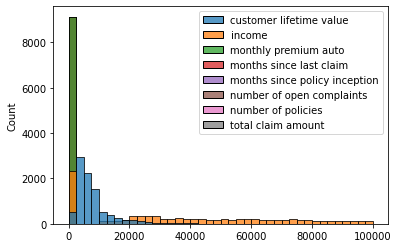

In [24]:
# Check outliers in numericals
sns.histplot(data_num, bins=40)

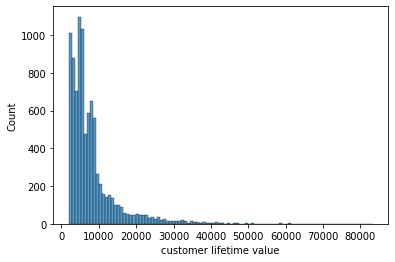

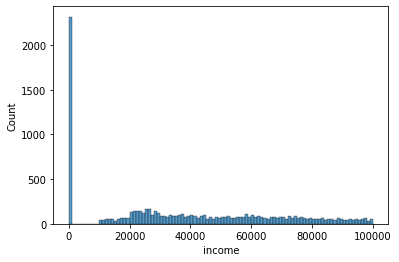

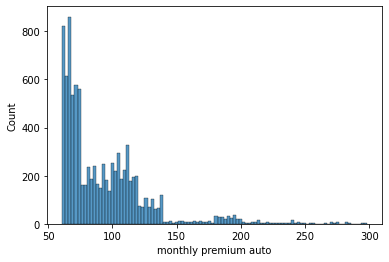

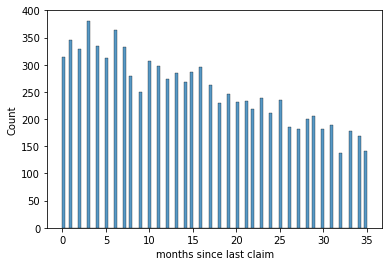

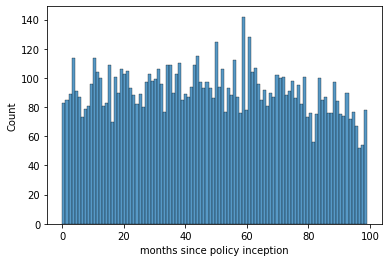

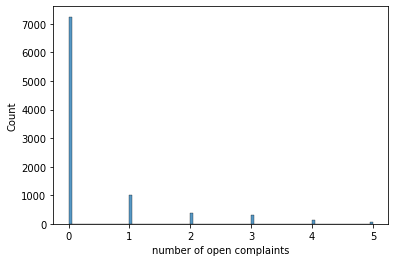

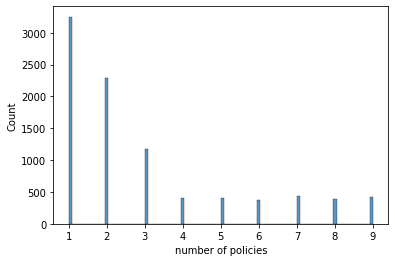

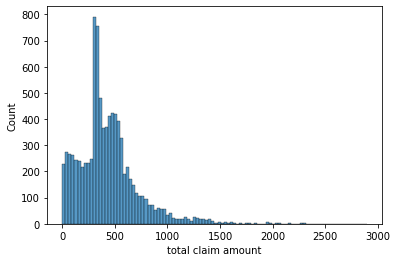

In [25]:
for i in range(data_num.shape[1]):
    sns.histplot(data_num[data_num.columns[i]], bins=100)
    plt.show()

<AxesSubplot:>

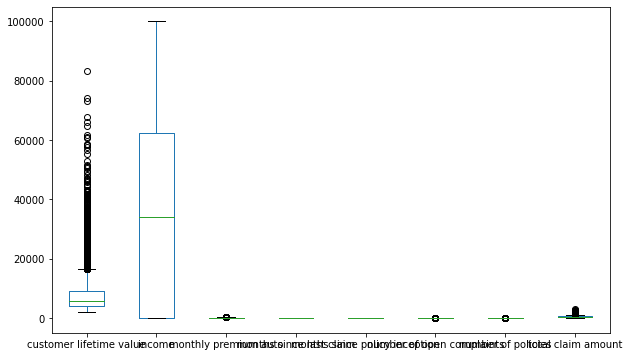

In [26]:
data_num.plot(kind='box',figsize=(10,6))
# Horizontal data_num.plot(kind='box',figsize=(10,6),vert=False)

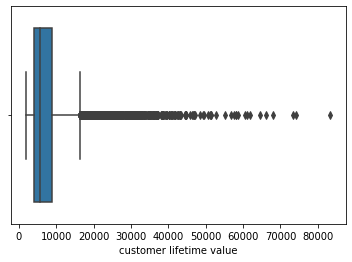

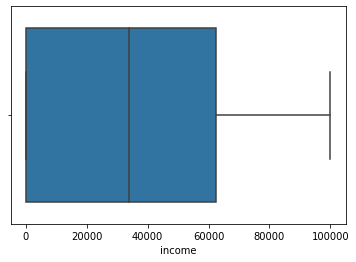

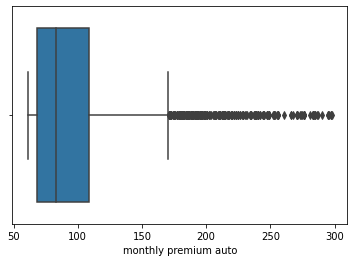

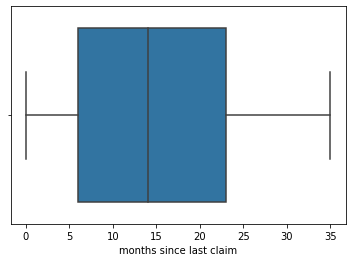

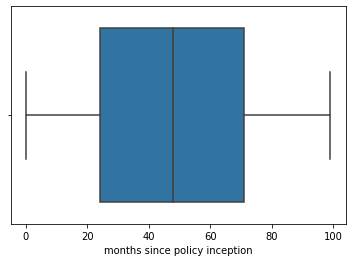

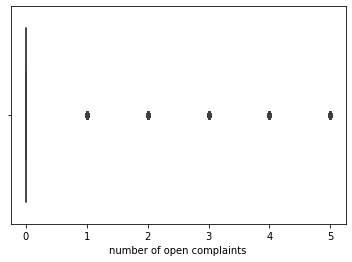

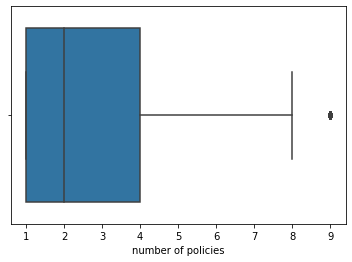

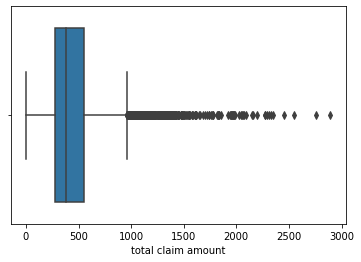

In [27]:

# sns.boxplot(y=numericals['income'], data=numericals)
# for each column data[['total claim amount']].boxplot()
# plt.show()


# for loop to boxplot from Dina 
for i in range(data_num.shape[1]):
    sns.boxplot(data_num[data_num.columns[i]])
    plt.show()
    
 

In [34]:
# Check outliers in categorical


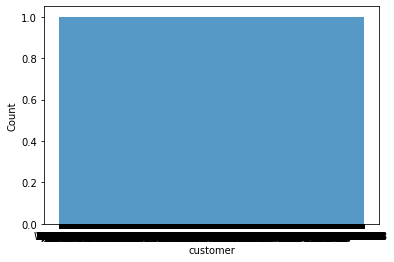

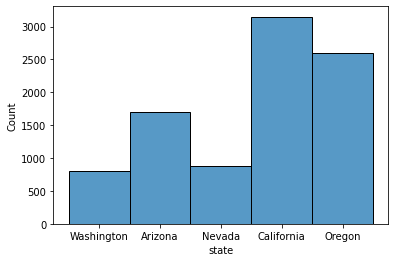

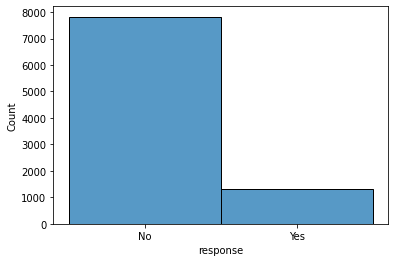

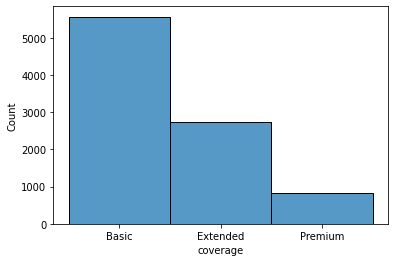

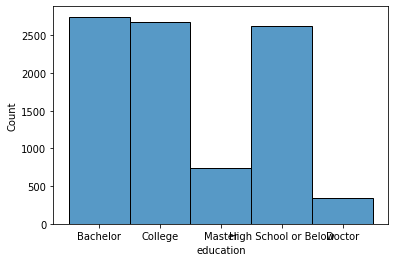

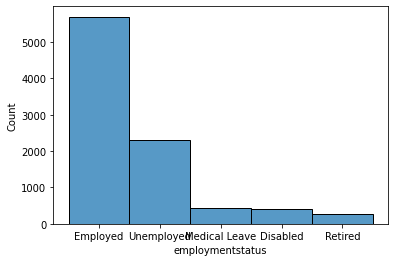

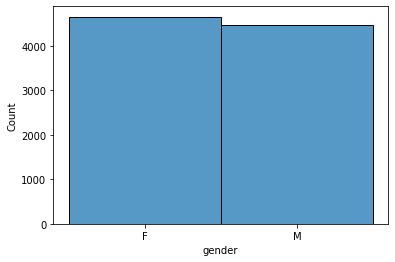

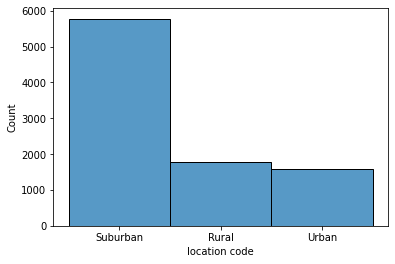

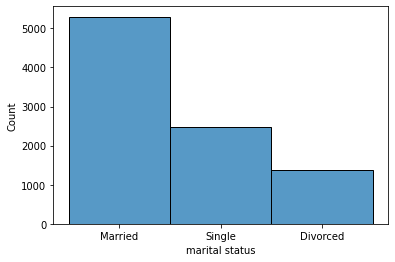

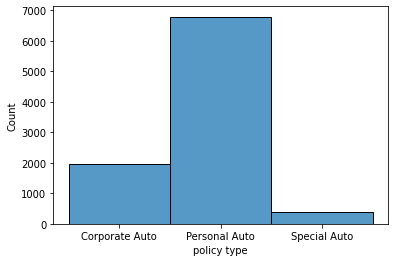

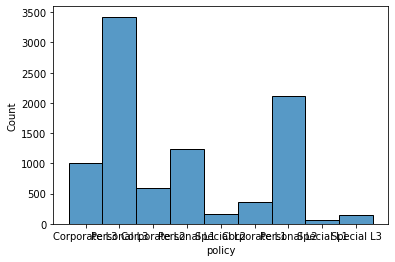

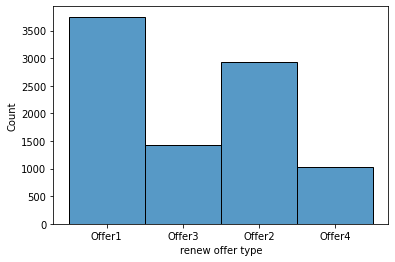

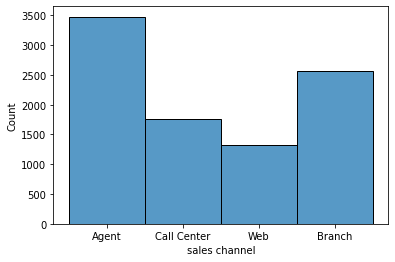

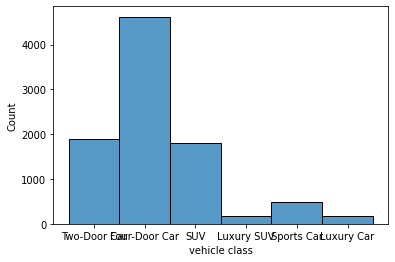

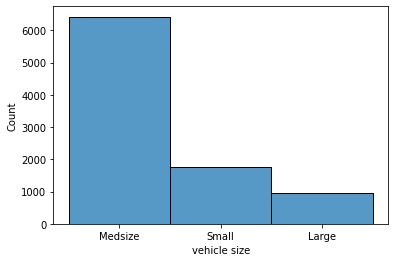

In [31]:

for i in range(data_cat.shape[1]):
    sns.histplot(data_cat[data_cat.columns[i]], bins=50)
    plt.show()

<AxesSubplot:>

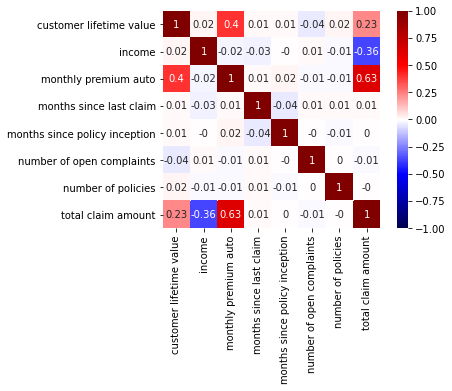

In [33]:
# Check multicollinearity in numerical variables

sns.heatmap(data_num.corr().round(2),vmin=-1, vmax=1, center=0, annot = True,square=True,
cmap='seismic')

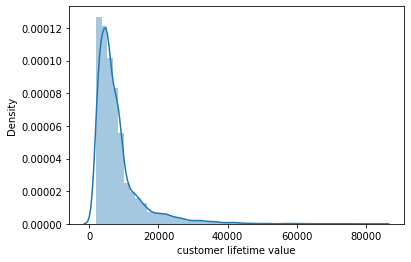

In [16]:
# attention to 'customer lifetime value', 
# 'monthly premium auto', 'number of policies', 'total claim amount'

sns.distplot(data_num['customer lifetime value'])
plt.show()

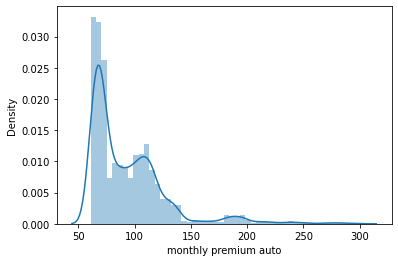

In [36]:
sns.distplot(data_num['monthly premium auto'])
plt.show()

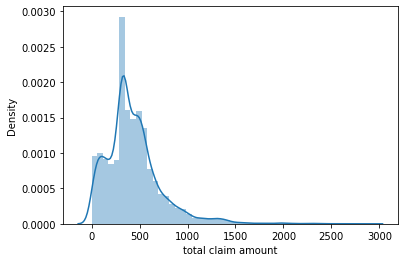

In [37]:
sns.distplot(data_num['total claim amount'])
plt.show()

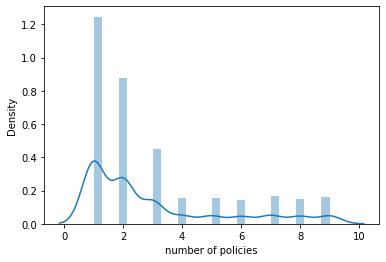

In [38]:
sns.distplot(data_num['number of policies'])
plt.show()

In [ ]:
# log transformation to reduce noise with outliers

In [17]:
def log_transform_clean(x):
    x = np.log(x)
    if np.isfinite(x):
        return x
    else:
        return np.NAN

data['customer lifetime value_log'] = list(map(log_transform_clean, data['customer lifetime value']))

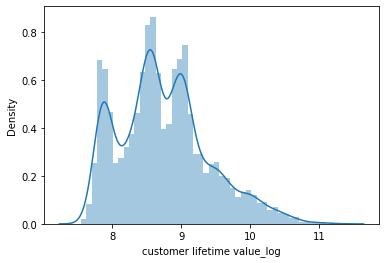

In [18]:
sns.distplot(data['customer lifetime value_log'])
plt.show()

In [19]:
def log_transform_clean(x):
    x = np.log(x)
    if np.isfinite(x):
        return x
    else:
        return np.NAN

data['monthly premium auto_log'] = list(map(log_transform_clean, data['monthly premium auto']))

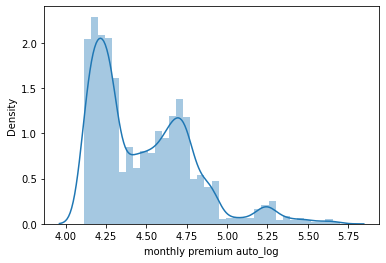

In [20]:
sns.distplot(data['monthly premium auto_log'])
plt.show()

In [21]:
def log_transform_clean(x):
    x = np.log(x)
    if np.isfinite(x):
        return x
    else:
        return np.NAN

data['total claim amount_log'] = list(map(log_transform_clean, data['total claim amount']))

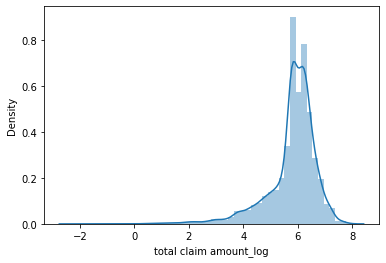

In [22]:
sns.distplot(data['total claim amount_log'])
plt.show()

In [23]:


data['customer lifetime value_'] = np.where(data['customer lifetime value']<=0,0,data['customer lifetime value'])
# now calculate mean of the new column , exluding zeros in the count 
mean = np.sum(data['customer lifetime value_'])/len(data[data['customer lifetime value_']>0])
data['customer lifetime value_'] = data['customer lifetime value_'].replace(0,mean)

In [24]:
from scipy import stats
xt, lmbda = stats.boxcox(data['customer lifetime value_'])

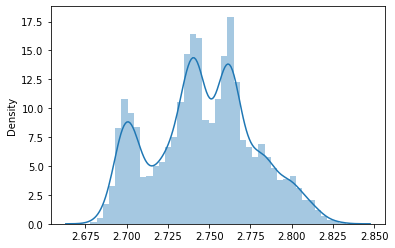

In [25]:
sns.distplot(xt)
plt.show()

In [26]:
# Data Transformation = new_data

data.shape

(9134, 28)

In [27]:
new_data = data.drop(['customer'], axis=1)

new_data.shape

(9134, 27)

In [28]:
# Normalization of the numerical variables
# to bring the data to plot a curve of the columns close to the normal cuve like the curve/campana de Gauss
# the Y in this example is total claim amount. 
# The Y cann't be transformaded and should not be normalize sklearn
# sklearn only on the other features considered as X

In [29]:
X_num = new_data.select_dtypes(include = np.number)
X_cat = new_data.select_dtypes(include = np.object)
print(X_num.shape)
print(X_cat.shape)

(9134, 12)
(9134, 14)


In [30]:
from sklearn.preprocessing import Normalizer
transformer = Normalizer().fit(X_num)
X_num_normalized = transformer.transform(X_num)
X_num_normalized = pd.DataFrame(X_num_normalized)

X_num_normalized.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.048989,0.997573,0.001223,0.000567,0.000089,0.0,0.000018,0.006822,0.000140,0.000075,0.000106,0.048989
1,0.702467,0.000000,0.009461,0.001308,0.004227,0.0,0.000805,0.113878,0.000891,0.000457,0.000708,0.702467
2,0.247528,0.936663,0.002074,0.000346,0.000730,0.0,0.000038,0.010880,0.000182,0.000090,0.000122,0.247528
3,0.706211,0.000000,0.009791,0.001663,0.006004,0.0,0.000647,0.048943,0.000826,0.000431,0.000579,0.706211
4,0.063924,0.995899,0.001658,0.000273,0.001000,0.0,0.000023,0.003138,0.000180,0.000097,0.000112,0.063924


In [ ]:
# Encoding categorical variables

In [31]:
X_cat.head()

,state,response,coverage,education,employmentstatus,gender,location code,marital status,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [32]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='error', drop='first').fit(X_cat)
X_cat_encoded = encoder.transform(X_cat).toarray()
X_cat_encoded = pd.DataFrame (X_cat_encoded)

X_cat_encoded.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [33]:
# X-y split train set and test set

In [34]:
X = pd.DataFrame(np.concatenate((X_num_normalized.drop([7], axis = 1), X_cat_encoded), axis=1))
y = pd.DataFrame(X_num_normalized[7])

In [36]:
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53
0,0.048989,0.997573,0.001223,0.000567,0.000089,0.0,0.000018,0.000140,0.000075,0.000106,0.048989,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.702467,0.000000,0.009461,0.001308,0.004227,0.0,0.000805,0.000891,0.000457,0.000708,0.702467,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.247528,0.936663,0.002074,0.000346,0.000730,0.0,0.000038,0.000182,0.000090,0.000122,0.247528,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.706211,0.000000,0.009791,0.001663,0.006004,0.0,0.000647,0.000826,0.000431,0.000579,0.706211,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.063924,0.995899,0.001658,0.000273,0.001000,0.0,0.000023,0.000180,0.000097,0.000112,0.063924,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [38]:
y.head()

,7
0,0.006822
1,0.113878
2,0.010880
3,0.048943
4,0.003138


In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [ ]:
# Apply model

In [40]:
X_train.shape


(6393, 54)

In [41]:
y_train.shape

(6393, 1)

In [42]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)

predictions  = lm.predict(X_test)
r2_score(y_test, predictions)

0.9537925149075043

In [43]:
mse = mean_squared_error(y_test, predictions) # function from sklearn, like r2
mse

7.092709867264939e-05

In [44]:
rmse = math.sqrt(mse)
rmse

0.008421822764262461

# End -------------------------------
